## Programming Q2
## This question consists of two parts. In the first part, data analysis is performed from Task 1 to Task 6 to get the initial information about the data and in the second part from Task 7 to Task 13, MLP is constructed to peform the regression

## Dataset description: Classification Problem to detect diabetes
## Features of the dataset
Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

## Part 1- Data Analysis(Task 1 to Task 6)

**Task 1:** Import the useful libraries: numpy, pandas, matplotlib, seaborn and Read the diabetes dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Task 2:** Print the following results
* Information of dataset
* Statistical summary of dataset

In [6]:
df.describe()   #summary of descriptive statistics of dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()   #Information of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Task 3:** Check null values (If there is any null values remove that row)

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Task 4:** Identify the unique labels present in the dataset.

In [11]:
print("The unique number of Outcome labels are: ", df['Outcome'].nunique())

The unique number of Outcome labels are:  2


**Task 6:** Create array of the **independent (X)** and **dependent (y)** variables.

In [13]:
features = ['Pregnancies','BloodPressure','SkinThickness','Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age']
target = ['Outcome']

X = df[features]
y = df[target]

## Part 2 - Perform the basic preprocessing of the data and constructing an MLP to classify the diabetes (Task 7 to Task 14)

**Task 7:** Perform train-test split (75:25)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [15]:
print("The size of train dataset: ", X_train.shape)
print("The size of test dataset: ", X_test.shape)

The size of train dataset:  (576, 8)
The size of test dataset:  (192, 8)


**Task 8:** Scale the dataset using Normalizer
$$\frac{data_i - mean}{std}$$

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Task 9:** Build Multi Layer Perceptron model for classification.
* Number of hidden layer:- 3 
* Neurons in hiddden layer:- 8, 8, 8
* activation function: - relu
* solver: - adam
* alpha: - 0.01

In [17]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(8,8,8),
                        max_iter = 500,activation = 'relu',  #first apply logistic then relu accuracy will be change
                        solver = 'adam', learning_rate_init=0.01)

In [19]:
y_train_1d = np.ravel(y_train)  # To change y_train into 1D (otherwise during fitting there will be error)

In [20]:
mlp_clf.fit(X_train, y_train_1d) #Fitting the model on train dataset

MLPClassifier(hidden_layer_sizes=(8, 8, 8), learning_rate_init=0.01,
              max_iter=500)

**Task 10:** Check the performance of the model.

In [21]:
from sklearn.metrics import accuracy_score

y_pred = mlp_clf.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.74


**Task 11:** Perform HyperParameter Tuning using Grid Search method.

In [26]:
from sklearn.model_selection import GridSearchCV  

mlp_clf1=MLPClassifier(hidden_layer_sizes=(8,8,8), max_iter=500,activation='relu',solver='adam')
gridvalue = {'learning_rate_init':[0.002,.005,0.01,.09,1,5,10,25],'max_iter':[400,600,1100]}
grid_acc = GridSearchCV(mlp_clf1,param_grid = gridvalue,scoring = 'recall')
grid_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_predacc = grid_acc.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

**Task 12:** Print optimal value of Hyper Parameter obtained by Grid Search.

In [27]:
grid_acc.best_params_

{'learning_rate_init': 0.01, 'max_iter': 600}

**Task 13:** Build and Evaluate the model on the basis of values of optimal value of Hyper Parameter.

In [29]:
from sklearn.neural_network import MLPClassifier  
#Create a multi-layer perceptron model to verify the outcomes of the optimal value.

mlp_clf2=MLPClassifier(hidden_layer_sizes=(8,8,8), max_iter=600,activation='relu',solver='adam',learning_rate_init=0.01)

In [31]:
y_train_1d=np.ravel(y_train)  #change y_train to 1D
mlp_clf2.fit(X_train, y_train_1d)  #fit the model on training dataset

MLPClassifier(hidden_layer_sizes=(8, 8, 8), learning_rate_init=0.01,
              max_iter=600)

In [33]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# Create and evaluate the model using the hyperparameter's optimal values.
y_pred= mlp_clf2.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,y_pred)))

Accuracy: 0.78


**Task 14:** Build the confusion matrix and generate a heat map

Confusion Matrix : 
[[104  27]
 [ 15  46]]


<AxesSubplot:>

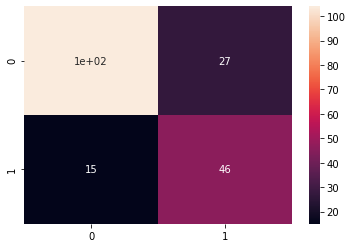

In [35]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)